In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import time 

In [2]:
pwd

'C:\\EPIC\\2016-Analysis'

In [6]:
file = 'C:/EPIC/2016-Analysis/filterJanuary2016.csv'

### Now we will process the data for seven measures or criterias.

## Monthly Average Availability

In [7]:
data = pd.read_csv(file)

In [8]:
data.head()

,company,station,pollutant,date_time,emission,year,month,date,hour,minute
0,ACC Limited,stack1,SO2,2016-01-01 11:00:00,16.500000,2016,1,1,11,0
1,ACC Limited,stack1,NO,2016-01-01 11:00:00,641.409973,2016,1,1,11,0
2,ACC Limited,stack1,PM,2016-01-01 11:00:00,7.640000,2016,1,1,11,0
3,ACC Limited,CEMS-3,PM,2016-01-01 11:00:00,0.500000,2016,1,1,11,0
4,ACC Limited,CEMS-2,SO2,2016-01-01 11:00:00,44.299999,2016,1,1,11,0


In [9]:
dataPM = data[data['pollutant'] == 'PM']

In [10]:
dataPM.head(100)

,company,station,pollutant,date_time,emission,year,month,date,hour,minute
2,ACC Limited,stack1,PM,2016-01-01 11:00:00,7.640000,2016,1,1,11,0
3,ACC Limited,CEMS-3,PM,2016-01-01 11:00:00,0.500000,2016,1,1,11,0
6,ACC Limited,CEMS-2,PM,2016-01-01 11:00:00,50.110001,2016,1,1,11,0
10,ACC Limited,stack1,PM,2016-01-01 11:01:00,7.920000,2016,1,1,11,1
11,ACC Limited,CEMS-3,PM,2016-01-01 11:01:00,0.500000,2016,1,1,11,1
14,ACC Limited,CEMS-2,PM,2016-01-01 11:01:00,47.639999,2016,1,1,11,1
15,ACC Limited,CEMS-4,PM,2016-01-01 11:01:00,28.120001,2016,1,1,11,1
21,ACC Limited,stack1,PM,2016-01-01 11:02:00,7.870000,2016,1,1,11,2
22,ACC Limited,CEMS-3,PM,2016-01-01 11:02:00,0.460000,2016,1,1,11,2
23,ACC Limited,CEMS-4,PM,2016-01-01 11:02:00,22.790001,2016,1,1,11,2


In [11]:
len(data)

13117616

In [12]:
dataPMperMinute = dataPM.groupby(['company','station','pollutant','year','month','date','hour','minute'])['emission'].mean()

In [20]:
newData = dataPMperMinute.to_frame().reset_index(level = ['company','station','pollutant','year','month','date','hour','minute'])

In [21]:
newData

,company,station,pollutant,year,month,date,hour,minute,emission
0,ACC Limited,CEMS-2,PM,2016,1,1,11,0,50.110001
1,ACC Limited,CEMS-2,PM,2016,1,1,11,1,47.639999
2,ACC Limited,CEMS-2,PM,2016,1,1,11,2,47.250000
3,ACC Limited,CEMS-2,PM,2016,1,1,11,3,43.880001
4,ACC Limited,CEMS-2,PM,2016,1,1,11,4,40.669998
5,ACC Limited,CEMS-2,PM,2016,1,1,11,5,41.470001
6,ACC Limited,CEMS-2,PM,2016,1,1,11,6,36.939999
7,ACC Limited,CEMS-2,PM,2016,1,1,11,7,35.080002
8,ACC Limited,CEMS-2,PM,2016,1,1,11,8,36.380001
9,ACC Limited,CEMS-2,PM,2016,1,1,11,9,35.860001


In [22]:
dataPMAvailibility = newData.groupby(['company','station','pollutant','year','month']).count()

In [23]:
dataPMAvailibility

date  \
company                                            station pollutant year month          
ACC Limited                                        CEMS-2  PM        2016 1      25385   
                                                   CEMS-3  PM        2016 1      21331   
                                                   CEMS-4  PM        2016 1      25736   
                                                   stack1  PM        2016 1      25823   
Aarti Steels Ltd                                   CEMS-1  PM        2016 1      22997   
                                                   CEMS-2  PM        2016 1      27161   
                                                   CEMS-3  PM        2016 1      23468   
                                                   CEMS-4  PM        2016 1      23466   
                                                   CEMS-5  PM        2016 1      23446   
                                                   CEMS-6  PM        2016 1      23463   
Action Ispat and Power (P) Ltd                     CEMS-1  PM        2016 1       6961   
                                                   CEMS-2  PM        2016 1       4927   
                                                   CEMS-3  PM        2016 1       3312   
Adhunik Metaliks Ltd.                              CEMS-1  PM        2016 1       2823   
                                                   CEMS-10 PM        2016 1       8178   
                                                   CEMS-11 PM        2016 1       8190   
                                                   CEMS-2  PM        2016 1       7213   
                                                   CEMS-3  PM        2016 1       7177   
                                                   CEMS-4  PM        2016 1       7204   
                                                   CEMS-5  PM        2016 1       8326   
                                                   CEMS-6  PM        2016 1       8023   
                                                   CEMS-7  PM        2016 1       8018   
                                                   CEMS-8  PM        2016 1       5796   
                                                   CEMS-9  PM        2016 1       5779   
Aditya Aluminium (A Unit of Hindalco Industries... CEMS-1  PM        2016 1       9231   
                                                   CEMS-2  PM        2016 1      11052   
                                                   CEMS-3  PM        2016 1       9198   
                                                   CEMS-4  PM        2016 1       8147   
                                                   CEMS-5  PM        2016 1      11512   
                                                   CEMS-7  PM        2016 1       9781   
...                                                                                ...   
Sesa Sterlite Ltd (Smelter and CPP)                CEMS-6  PM        2016 1       8723   
                                                   CEMS-7  PM        2016 1       9110   
                                                   CEMS-8  PM        2016 1       8918   
                                                   CEMS-9  PM        2016 1       8791   
                                                   CPP     PM        2016 1       9277   
Shiv Mettalicks (P) Ltd                            CEMS-1  PM        2016 1       5185   
Shree Hari Sponge Pvt. Ltd.                        CEMS-1  PM        2016 1       9367   
Shri Jagannath Steels and Power Ltd.               CEMS-1  PM        2016 1      23312   
Shyam Metalics and Energy Ltd                      CEMS-1  PM        2016 1       8558   
                                                   CEMS-2  PM        2016 1       8388   
                                                   CEMS-3  PM        2016 1       8648   
                                                   CEMS-4  PM        2016 1       8303   
Sumrit Metaliks Pvt. Ltd.       

In [24]:
newdata = dataPMAvailibility.reset_index(level = ['company','station','pollutant','year','month'])

In [25]:
newdata['availability'] = newdata['emission']/(1440*31)

In [26]:
newdata.drop(newdata.columns[[5,6,7,8]],axis = 1, inplace = True)

In [27]:
newdata

,company,station,pollutant,year,month,availability
0,ACC Limited,CEMS-2,PM,2016,1,0.568660
1,ACC Limited,CEMS-3,PM,2016,1,0.477845
2,ACC Limited,CEMS-4,PM,2016,1,0.576523
3,ACC Limited,stack1,PM,2016,1,0.578472
4,Aarti Steels Ltd,CEMS-1,PM,2016,1,0.515166
5,Aarti Steels Ltd,CEMS-2,PM,2016,1,0.608445
6,Aarti Steels Ltd,CEMS-3,PM,2016,1,0.525717
7,Aarti Steels Ltd,CEMS-4,PM,2016,1,0.525672
8,Aarti Steels Ltd,CEMS-5,PM,2016,1,0.525224
9,Aarti Steels Ltd,CEMS-6,PM,2016,1,0.525605


In [28]:
newdata.to_csv('availabilityJanuary.csv')

In [29]:
newdata = newdata[['company','station','availability']]

In [30]:
newdata_sorted = newdata.sort_values(by = 'availability',ascending = False)

In [31]:
newdata_sorted.head(20)

,company,station,availability
34,BILT Graphics Paper Products Ltd,CEMS-2,0.803427
267,Vedanta Ltd.,CEMS-2,0.771461
105,Jindal Stainless Ltd,CPP,0.733087
65,Essar Steel India Limited,CEMS-1,0.718481
104,Jindal Stainless Ltd,CEMS-5,0.708804
273,Yazdani Steel and Power Limited,CEMS-1,0.705892
126,Jindal Steel and Power Ltd,CEMS-2,0.705780
127,Jindal Steel and Power Ltd,CEMS-3,0.705063
265,VISA SunCoke Limited,CEMS-2,0.701389
59,Birla Tyres,CEMS-2,0.700134


In [32]:
newdata_sorted.tail(20)

,company,station,availability
89,Indian Metal and Ferro Alloys Ltd,boiler-5,0.031138
54,Bhushan Steel Limited,CEMS-2,0.031026
198,Pawanjay Sponge Iron Limited,CEMS-1,0.022357
258,Tata Sponge Iron Ltd,KILN1,0.019803
260,Tata Sponge Iron Ltd,KILN3,0.019579
154,"NALCO Ltd.,Refinery",CISFAAQ2,0.019288
46,Bhushan Power and Steel Limited,DRI-6,0.015233
45,Bhushan Power and Steel Limited,DRI-5,0.015233
51,Bhushan Power and Steel Limited,WHRB-10,0.014292
259,Tata Sponge Iron Ltd,KILN2,0.014046


### Distribution of Average monthly availability

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
availability = newdata['availability']
weights = np.ones_like(availability)/float(len(availability))

(array([ 0.06569343,  0.03649635,  0.04744526,  0.0729927 ,  0.04014599,
         0.03284672,  0.06934307,  0.12773723,  0.09854015,  0.02189781,
         0.00729927,  0.01094891,  0.01824818,  0.01094891,  0.01094891,
         0.00729927,  0.01094891,  0.01094891,  0.02554745,  0.03284672,
         0.04379562,  0.08759124,  0.01459854,  0.00364964,  0.02189781,
         0.03284672,  0.02554745,  0.00364964,  0.00364964,  0.00364964]),
 array([  2.24014337e-05,   2.68025687e-02,   5.35827360e-02,
          8.03629032e-02,   1.07143070e-01,   1.33923238e-01,
          1.60703405e-01,   1.87483572e-01,   2.14263740e-01,
          2.41043907e-01,   2.67824074e-01,   2.94604241e-01,
          3.21384409e-01,   3.48164576e-01,   3.74944743e-01,
          4.01724910e-01,   4.28505078e-01,   4.55285245e-01,
          4.82065412e-01,   5.08845579e-01,   5.35625747e-01,
          5.62405914e-01,   5.89186081e-01,   6.15966249e-01,
          6.42746416e-01,   6.69526583e-01,   6.96306750e-01,
  

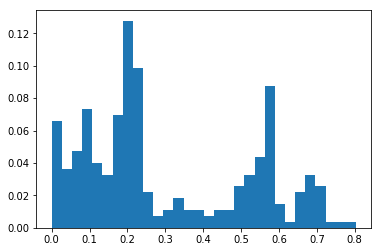

In [35]:
plt.hist(availability, weights=weights, bins = 30)

## Half-Hour availability

In [36]:
halfHourData = dataPM[['company','station','hour','minute']]

In [37]:
halfHourData[['hour','minute']].values

array([[11,  0],
       [11,  0],
       [11,  0],
       ..., 
       [21, 21],
       [21, 10],
       [21,  3]], dtype=int64)

In [38]:
halfHourData['minutesElapsed'] = halfHourData[['hour','minute']].apply(lambda row: (60*row['hour'] + row['minute']), axis = 1 )

C:\Users\Jyoti\Anaconda3\envs\carnd-term1\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [39]:
halfHourData = halfHourData[['company','station','minutesElapsed']]

In [40]:
halfHourData.head(100)

,company,station,minutesElapsed
2,ACC Limited,stack1,660
3,ACC Limited,CEMS-3,660
6,ACC Limited,CEMS-2,660
10,ACC Limited,stack1,661
11,ACC Limited,CEMS-3,661
14,ACC Limited,CEMS-2,661
15,ACC Limited,CEMS-4,661
21,ACC Limited,stack1,662
22,ACC Limited,CEMS-3,662
23,ACC Limited,CEMS-4,662


In [41]:
companyName = halfHourData.company.unique()
l = []
for company in companyName:
    cdata = halfHourData[halfHourData['company'] == company]
    stations = cdata.station.unique()
    for station in stations:
        sdata = cdata[cdata['station'] == station].sort()
        counter = 0
        for i in range(47):
            kdata = sdata[(sdata['minutesElapsed'] > 30*i) & (sdata['minutesElapsed'] < 30*(i+1))]
            if len(kdata) <= 22:
                counter = counter + 1
        if counter > 24:
            l.append((company,station))
        

C:\Users\Jyoti\Anaconda3\envs\carnd-term1\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort(....) is deprecated, use sort_index(.....)


In [42]:
l

[('Birla Tyres', 'CEMS-1'),
 ('Bhushan Power and Steel Limited', 'DRI-7'),
 ('Bhushan Power and Steel Limited', 'DRI-6'),
 ('Bhushan Power and Steel Limited', 'DRI-5'),
 ('Bhushan Power and Steel Limited', 'WHRB-10'),
 ('B.R. Sponge and Power Ltd.', 'CEMS-1'),
 ('Bhushan Steel Limited', 'st1'),
 ('Bhushan Steel Limited', 'CEMS-1'),
 ('HINDALCO Ltd.,Captive Power Plant', 'st2'),
 ('HINDALCO Ltd.,Captive Power Plant', 'st3'),
 ('HINDALCO Ltd.,Captive Power Plant', 'st1'),
 ('HINDALCO Ltd., FRP Plant', 'CEMS-3'),
 ('Jai Balaji Jyoti Steels Limited', 'CEMS-1'),
 ('Jindal Steel and Power Limited', 'st6'),
 ('Mayur Electro Ceramics Pvt. Ltd.', 'CEMS-2'),
 ('MSP Metalics Limited', 'CEMS-8'),
 ('NALCO Ltd.,Refinery', 'CISFAAQ2'),
 ('OCL India Ltd,Cement Unit', 'Stack-10'),
 ('Pawanjay Sponge Iron Limited', 'CEMS-1'),
 ('Rungta Mines Limited', 'CEMS-4'),
 ('Rungta Mines Limited', 'CEMS-5'),
 ('Rungta Mines Limited', 'CEMS-1'),
 ('Rourkela Steel Plant', 'CEMS-15'),
 ('Samaleswari Ferro Metals Lt

In [43]:
halfHourAvailability = pd.DataFrame(l)

In [47]:
halfHourAvailability.columns = ['company','station']

halfHourAvailability['month'] = 'January'
halfHourAvailability

,company,station,month
0,Birla Tyres,CEMS-1,January
1,Bhushan Power and Steel Limited,DRI-7,January
2,Bhushan Power and Steel Limited,DRI-6,January
3,Bhushan Power and Steel Limited,DRI-5,January
4,Bhushan Power and Steel Limited,WHRB-10,January
5,B.R. Sponge and Power Ltd.,CEMS-1,January
6,Bhushan Steel Limited,st1,January
7,Bhushan Steel Limited,CEMS-1,January
8,"HINDALCO Ltd.,Captive Power Plant",st2,January
9,"HINDALCO Ltd.,Captive Power Plant",st3,January


In [48]:
halfHourAvailability.to_csv('halfHourAvailability.csv')

## Days with Zero Data

In [13]:
newData1 = dataPMperMinute.to_frame().reset_index(level = ['company','station','pollutant','year','month','date','hour','minute'])
    

In [73]:
newData1

,company,station,pollutant,year,month,date,hour,minute,emission
0,ACC Limited,CEMS-2,PM,2016,1,1,11,0,50.110001
1,ACC Limited,CEMS-2,PM,2016,1,1,11,1,47.639999
2,ACC Limited,CEMS-2,PM,2016,1,1,11,2,47.250000
3,ACC Limited,CEMS-2,PM,2016,1,1,11,3,43.880001
4,ACC Limited,CEMS-2,PM,2016,1,1,11,4,40.669998
5,ACC Limited,CEMS-2,PM,2016,1,1,11,5,41.470001
6,ACC Limited,CEMS-2,PM,2016,1,1,11,6,36.939999
7,ACC Limited,CEMS-2,PM,2016,1,1,11,7,35.080002
8,ACC Limited,CEMS-2,PM,2016,1,1,11,8,36.380001
9,ACC Limited,CEMS-2,PM,2016,1,1,11,9,35.860001


In [74]:
companyName = newData1.company.unique()
l = []
for company in companyName:
    cdata = newData1[newData1['company'] == company]
    stations = cdata.station.unique()
    for station in stations:
        sdata = cdata[cdata['station'] == station]
        zeroDate = set(range(32))-{0} - set(sdata.date.unique())
        for date in zeroDate:
            l.append((company,station, date))


In [77]:
l

[('ACC Limited', 'CEMS-2', 24),
 ('ACC Limited', 'CEMS-2', 10),
 ('ACC Limited', 'CEMS-2', 3),
 ('ACC Limited', 'CEMS-3', 24),
 ('ACC Limited', 'CEMS-3', 3),
 ('ACC Limited', 'CEMS-4', 24),
 ('ACC Limited', 'CEMS-4', 3),
 ('ACC Limited', 'stack1', 24),
 ('ACC Limited', 'stack1', 3),
 ('Aarti Steels Ltd', 'CEMS-1', 24),
 ('Aarti Steels Ltd', 'CEMS-1', 3),
 ('Aarti Steels Ltd', 'CEMS-2', 24),
 ('Aarti Steels Ltd', 'CEMS-2', 3),
 ('Aarti Steels Ltd', 'CEMS-3', 24),
 ('Aarti Steels Ltd', 'CEMS-3', 3),
 ('Aarti Steels Ltd', 'CEMS-4', 24),
 ('Aarti Steels Ltd', 'CEMS-4', 3),
 ('Aarti Steels Ltd', 'CEMS-5', 24),
 ('Aarti Steels Ltd', 'CEMS-5', 3),
 ('Aarti Steels Ltd', 'CEMS-6', 24),
 ('Aarti Steels Ltd', 'CEMS-6', 3),
 ('Action Ispat and Power (P) Ltd', 'CEMS-1', 1),
 ('Action Ispat and Power (P) Ltd', 'CEMS-1', 2),
 ('Action Ispat and Power (P) Ltd', 'CEMS-1', 3),
 ('Action Ispat and Power (P) Ltd', 'CEMS-1', 4),
 ('Action Ispat and Power (P) Ltd', 'CEMS-1', 5),
 ('Action Ispat and Power (P

In [78]:
zerodate = pd.DataFrame(l, columns = ['company', 'station','dates']) 

In [79]:
zerodate

,company,station,dates
0,ACC Limited,CEMS-2,24
1,ACC Limited,CEMS-2,10
2,ACC Limited,CEMS-2,3
3,ACC Limited,CEMS-3,24
4,ACC Limited,CEMS-3,3
5,ACC Limited,CEMS-4,24
6,ACC Limited,CEMS-4,3
7,ACC Limited,stack1,24
8,ACC Limited,stack1,3
9,Aarti Steels Ltd,CEMS-1,24


In [80]:
uniqueZerodates = zerodate.dates.unique()
uniqueZerodates

array([24, 10,  3,  1,  2,  4,  5,  6, 28, 29, 30, 31,  8,  9, 11, 12, 13,
       14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26,  7, 27], dtype=int64)

In [81]:
len(companyName)

86

#### Finding out a date when no company sent data. This is an indication that server may be having any issue.

In [82]:
ldates = []
for date in uniqueZerodates:
    companyWithDate = zerodate[zerodate['dates'] == date].company.unique()
    if len(companyWithDate) == len(companyName):
        ldates.append(date)
    
ldates    

[24]

#### Finding out dates when most of the companies(more than 50%) did not send data. There could be some other issue as well.

In [83]:
lmdates = []
for date in uniqueZerodates:
    companyWithDate = zerodate[zerodate['dates'] == date].company.unique()
    if len(companyWithDate) >= len(companyName)/2:
        lmdates.append(date)
lmdates

[24, 3]

## Data Quality checks

#### Fraction of low value observations

In [52]:
companyName = newData1.company.unique()
l = []
for company in companyName:
    cdata = newData1[newData1['company'] == company]
    stations = cdata.station.unique()
    for station in stations:
        sdata = cdata[cdata['station'] == station]
        m = len(sdata)
        lowdata = sdata[sdata['emission'] < 10 ]
        n = len(lowdata)
        ratio = float(n)/float(m)
        if ratio > 0.8:
            l.append((company,station, ratio))

In [53]:
l

[('ACC Limited', 'CEMS-3', 0.982373072054756),
 ('ACC Limited', 'stack1', 0.9372265035046277),
 ('Adhunik Metaliks Ltd.', 'CEMS-11', 0.9136752136752136),
 ('Aditya Aluminium (A Unit of Hindalco Industries Limited)',
  'CEMS-5',
  0.9735927727588604),
 ('Aditya Aluminium (A Unit of Hindalco Industries Limited)', 'CEMS-7', 1.0),
 ('Aditya Aluminium (A Unit of Hindalco Industries Limited)', 'CEMS-8', 1.0),
 ('BRG Iron and Steel Co. Pvt. Ltd.', 'CEMS-3', 1.0),
 ('Bhushan Power and Steel Limited', 'DRI-7', 0.9968102073365231),
 ('Bhushan Steel Limited', 'st1', 1.0),
 ('Birla Tyres', 'CEMS-1', 1.0),
 ('Essar Steel India Limited', 'CEMS-1', 0.9159729367380662),
 ('HINDALCO Ltd., FRP Plant', 'CEMS-1', 0.852385018909357),
 ('HINDALCO Ltd., FRP Plant', 'CEMS-3', 0.8737438804431847),
 ('HINDALCO Ltd.,Captive Power Plant', 'st1', 0.8333333333333334),
 ('HINDALCO Ltd.,Smelter Plant', 'FTP4', 0.9722617354196301),
 ('HINDALCO Ltd.,Smelter Plant', 'st1', 0.9953382368175697),
 ('HINDALCO Ltd.,Smelter P

In [54]:
lowValueTable = pd.DataFrame(l)
lowValueTable.columns = ['company','station','percentlowvalue']

In [55]:
lowValueTable

,company,station,percentlowvalue
0,ACC Limited,CEMS-3,0.982373
1,ACC Limited,stack1,0.937227
2,Adhunik Metaliks Ltd.,CEMS-11,0.913675
3,Aditya Aluminium (A Unit of Hindalco Industrie...,CEMS-5,0.973593
4,Aditya Aluminium (A Unit of Hindalco Industrie...,CEMS-7,1.000000
5,Aditya Aluminium (A Unit of Hindalco Industrie...,CEMS-8,1.000000
6,BRG Iron and Steel Co. Pvt. Ltd.,CEMS-3,1.000000
7,Bhushan Power and Steel Limited,DRI-7,0.996810
8,Bhushan Steel Limited,st1,1.000000
9,Birla Tyres,CEMS-1,1.000000


In [56]:
lowValueTable.to_csv('lowValueTable.csv')

### Fraction of low range observations

In [57]:
companyName = newData1.company.unique()
l = []
for company in companyName:
    cdata = newData1[newData1['company'] == company]
    stations = cdata.station.unique()
    for station in stations:
        sdata = cdata[cdata['station'] == station]
        m = len(sdata)
        median_data = sdata.emission.median()
        lowrange = sdata[(sdata['emission'] > median_data - 2) & (sdata['emission'] < median_data + 2) ]
        n = len(lowrange)
        ratio = float(n)/float(m)
        if ratio > 0.8:
            l.append((company,station, ratio))

In [59]:
lowRangeTable = pd.DataFrame(l)
lowRangeTable.columns = ['company','station','percentlowralue']
lowRangeTable

,company,station,percentlowralue
0,ACC Limited,stack1,0.884599
1,Aarti Steels Ltd,CEMS-1,0.815454
2,Action Ispat and Power (P) Ltd,CEMS-3,0.999094
3,Adhunik Metaliks Ltd.,CEMS-1,0.839532
4,Adhunik Metaliks Ltd.,CEMS-11,0.882295
5,Adhunik Metaliks Ltd.,CEMS-5,0.860317
6,Aditya Aluminium (A Unit of Hindalco Industrie...,CEMS-5,0.860059
7,Aditya Aluminium (A Unit of Hindalco Industrie...,CEMS-7,0.998569
8,Aditya Aluminium (A Unit of Hindalco Industrie...,CEMS-8,0.948170
9,Agrasen Sponge Private Limited,CEMS-1,0.953305


In [60]:
lowRangeTable.to_csv('lowrangetable.csv')

### Compliance check

#### Mean emission

In [2]:
###Currently I am assuming consent level as 100. But later I will pick up the value from consent table.

In [61]:
companyName = newData1.company.unique()
l = []
k = []
for company in companyName:
    cdata = newData1[newData1['company'] == company]
    stations = cdata.station.unique()
    for station in stations:
        sdata = cdata[cdata['station'] == station]
        m = len(sdata)
        mean_data = sdata.emission.mean()
        if mean_data > 100:
            meanNonCompliance = True
            k.append((company,station))
        nonCompliance = sdata[sdata['emission'] > 100]   
        n = len(nonCompliance)
        ratio = float(n)/float(m)
        if ratio > 0.1:
            l.append((company,station, ratio))

In [64]:
monthlyAverageNonCompliance = pd.DataFrame(k)
monthlyAverageNonCompliance.columns = ['company','station']
monthlyAverageNonCompliance

,company,station
0,Adhunik Metaliks Ltd.,CEMS-1
1,Adhunik Metaliks Ltd.,CEMS-5
2,Adhunik Metaliks Ltd.,CEMS-7
3,Agrasen Sponge Private Limited,CEMS-1
4,Agrasen Sponge Private Limited,CEMS-2
5,B.R. Sponge and Power Ltd.,CEMS-1
6,BILT Graphics Paper Products Ltd,CEMS-2
7,Bhushan Steel Limited,CEMS-2
8,Grewal Associates Pvt. Ltd.,CEMS-2
9,Indian Metal and Ferro Alloys Ltd,boiler-2


In [65]:
monthlyAverageNonCompliance.to_csv('monthlyAverageNonCompliance.csv')

In [66]:
nonCompliance = pd.DataFrame(l)
nonCompliance.columns = ['company','station','percentnoncompliance']
nonCompliance

,company,station,percentnoncompliance
0,Action Ispat and Power (P) Ltd,CEMS-2,0.343008
1,Adhunik Metaliks Ltd.,CEMS-1,0.875310
2,Adhunik Metaliks Ltd.,CEMS-3,0.192699
3,Adhunik Metaliks Ltd.,CEMS-5,0.904756
4,Adhunik Metaliks Ltd.,CEMS-6,0.245045
5,Adhunik Metaliks Ltd.,CEMS-7,0.629958
6,Adhunik Metaliks Ltd.,CEMS-9,0.163177
7,Agrasen Sponge Private Limited,CEMS-1,0.974497
8,Agrasen Sponge Private Limited,CEMS-2,0.970920
9,B.R. Sponge and Power Ltd.,CEMS-1,0.554264


In [67]:
nonCompliance.to_csv('noncompliance.csv')

### Other Data Checks apart from CEMS document, if there is any, will be continued after this.